<a href="https://colab.research.google.com/github/dizzySummer/statistics/blob/main/Exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
library(readxl)
library(tidyverse)

In [4]:
EatingHabits <-read_excel("/content/eat_habits.xlsx")

In [5]:
summary(EatingHabits)

   Respondent    Eat_restaurant       Time         Stressed    
 Min.   : 1.00   Min.   :1.000   Min.   :10.0   Min.   :1.000  
 1st Qu.:11.75   1st Qu.:2.000   1st Qu.:20.0   1st Qu.:1.750  
 Median :22.50   Median :2.500   Median :30.0   Median :2.000  
 Mean   :25.06   Mean   :2.739   Mean   :30.3   Mean   :2.114  
 3rd Qu.:37.25   3rd Qu.:4.000   3rd Qu.:40.0   3rd Qu.:3.000  
 Max.   :59.00   Max.   :5.000   Max.   :75.0   Max.   :4.000  
   Program         
 Length:88         
 Class :character  
 Mode  :character  
                   
                   
                   

In [21]:
head(EatingHabits)

Respondent,Eat_restaurant,Time,Stressed,Program
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,30,1,veterinary
2,2,45,2,soil science
3,3,25,1,forest science
4,4,15,2,veterinary
5,5,32,3,veterinary
6,1,30,2,forest science


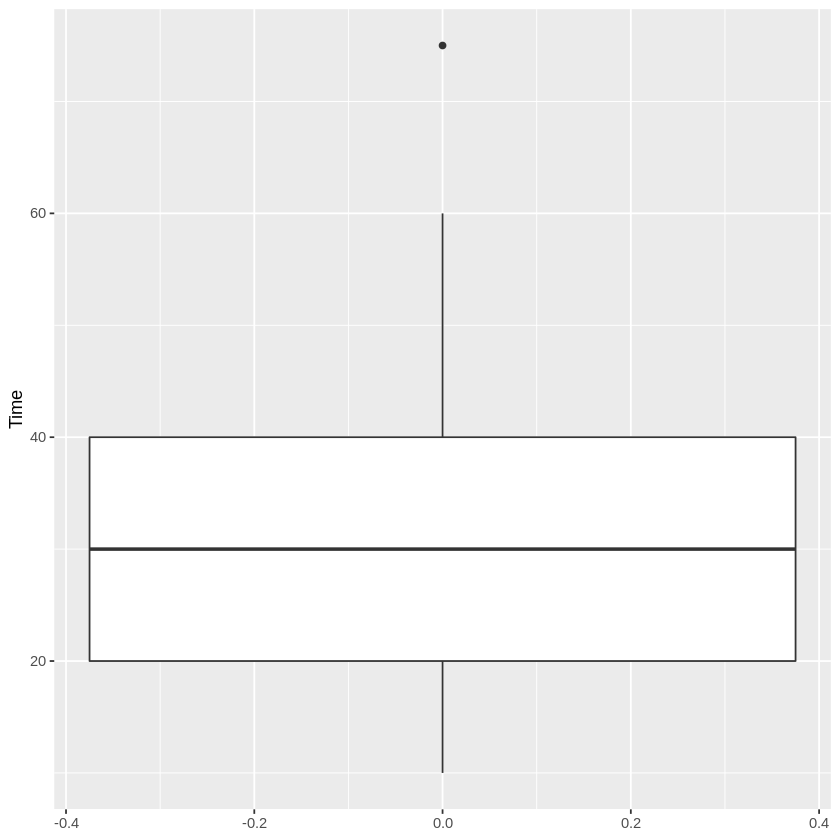

In [6]:
EatingHabits%>%ggplot(aes(y=Time))+geom_boxplot()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



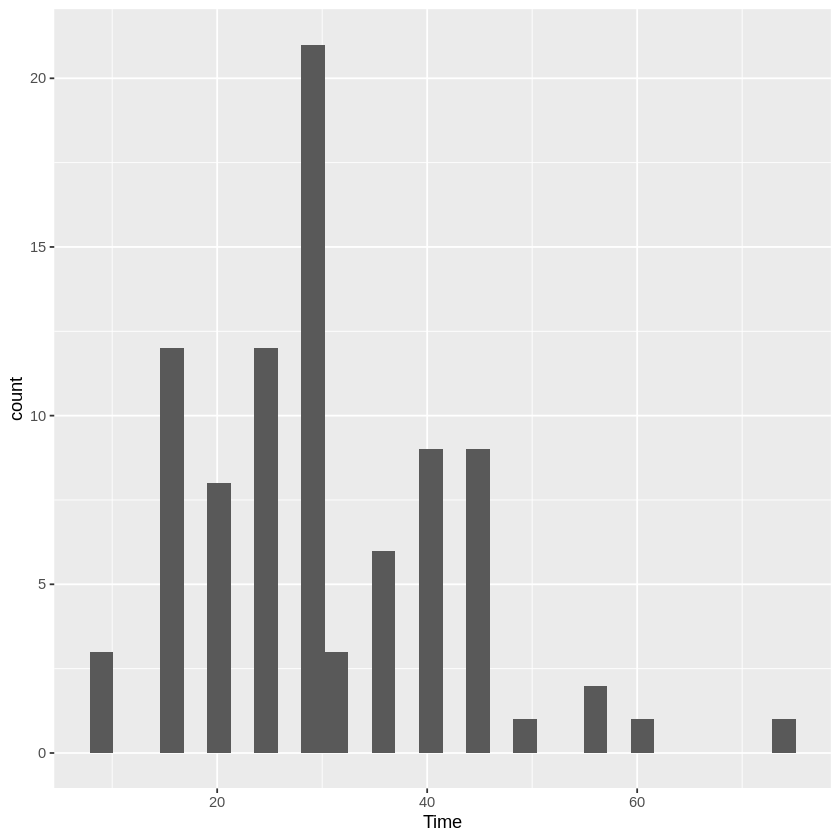

In [7]:
EatingHabits%>%ggplot(aes(Time))+geom_histogram()

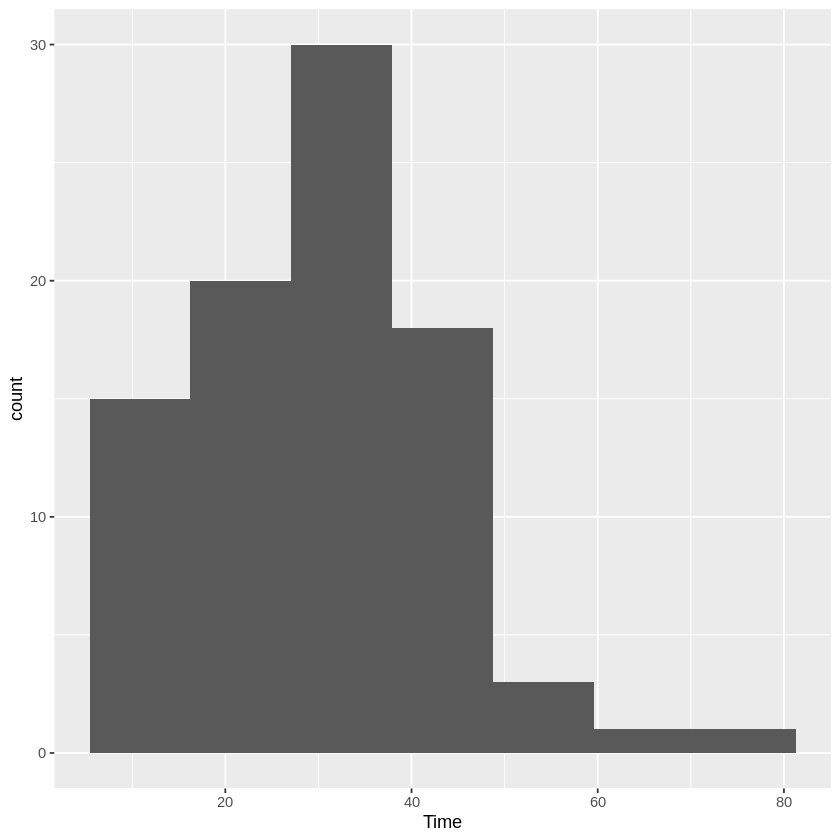

In [8]:
EatingHabits%>%ggplot(aes(Time))+geom_histogram(bins=7)

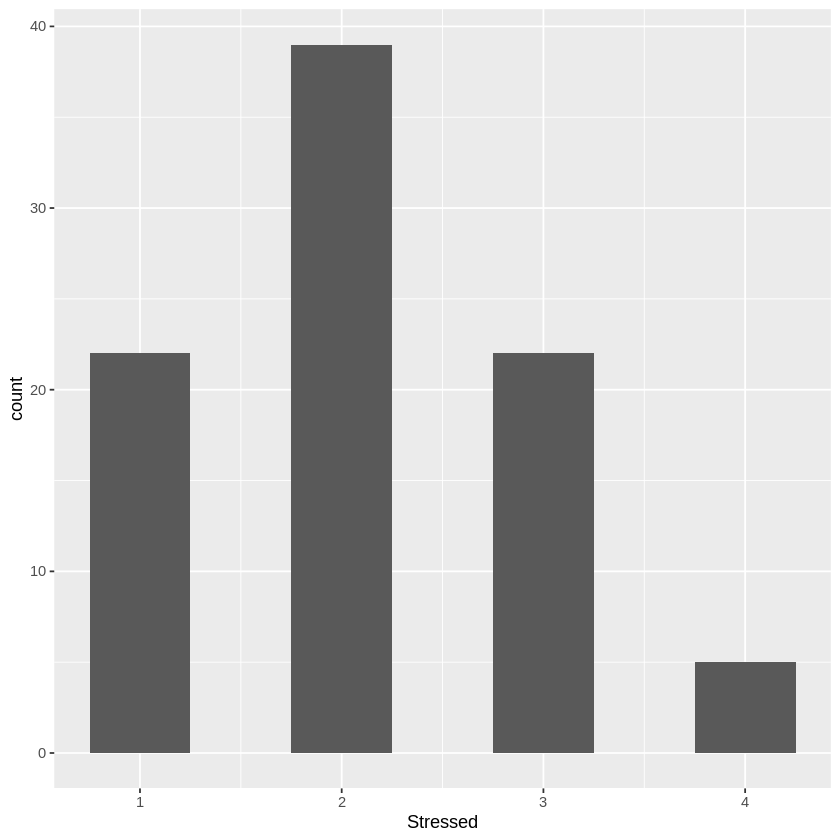

In [9]:
#c) Make a histogram for the variableStressed.
EatingHabits%>%ggplot(aes(Stressed))+geom_histogram(bins=7)

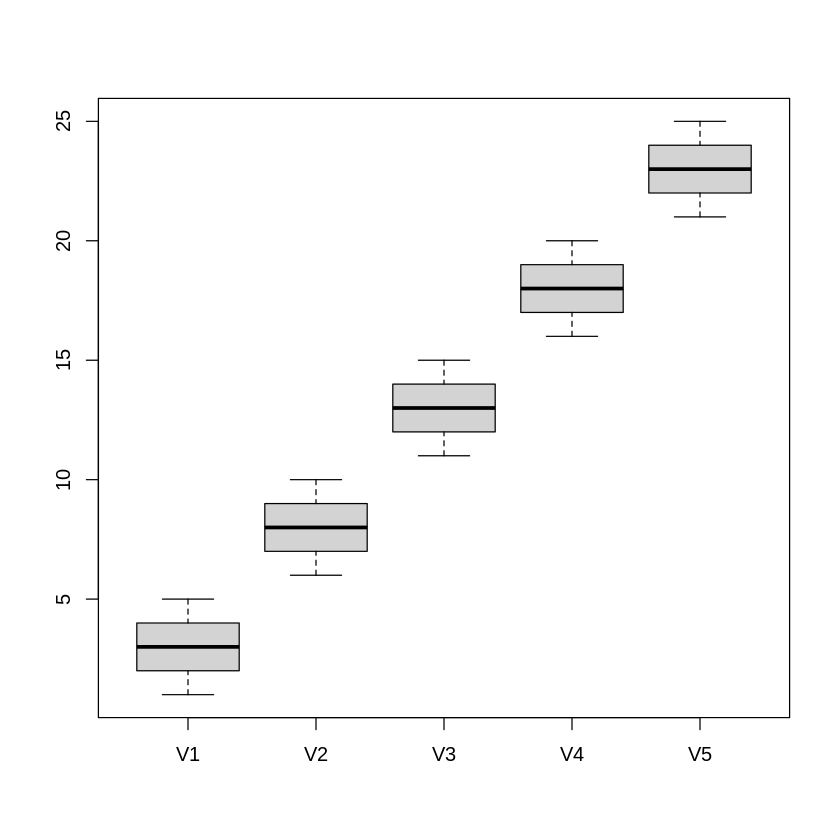

In [10]:
#d)Determine from the boxplots and the histograms if the variables have a symmetric or a skeweddistribution. Are there outliers? Which average value do the variables have (only guess from thegraphs)?

m <- matrix(1:25,5,5)
boxplot(x = as.list(as.data.frame(m)))

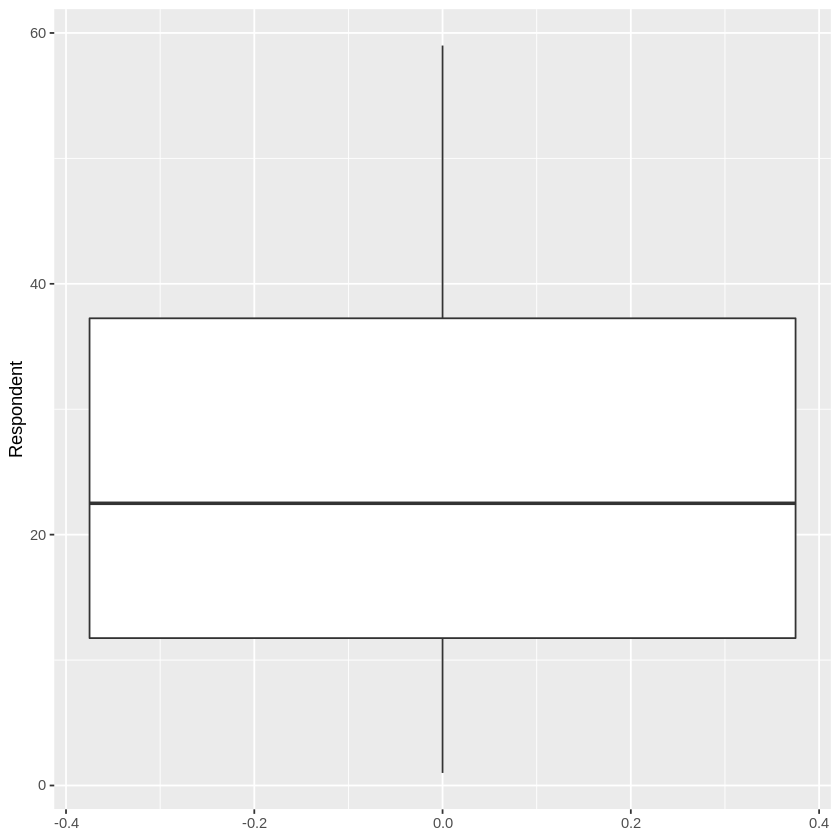

In [11]:
EatingHabits%>%ggplot(aes(y=Respondent))+geom_boxplot()

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



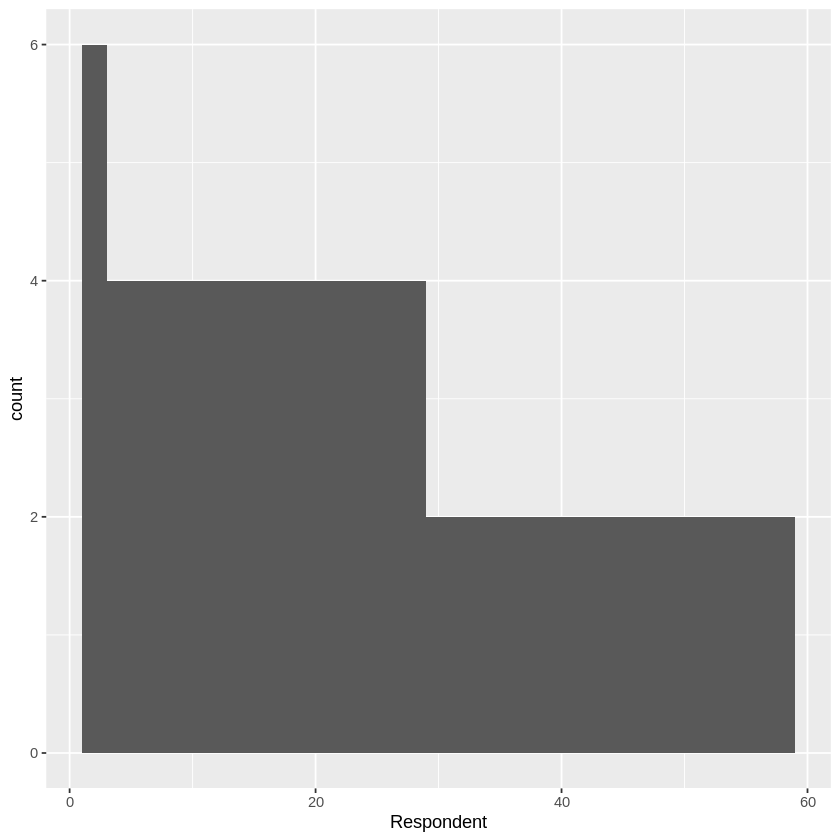

In [12]:
EatingHabits%>%ggplot(aes(Respondent))+geom_histogram()

In [13]:
EatingHabits%>%summarise(meanTime =mean(Time), medianTime =median(Time),varianceTime =var(Time), sdAge =sd(Time))

meanTime,medianTime,varianceTime,sdAge
<dbl>,<dbl>,<dbl>,<dbl>
30.29545,30,145.4519,12.06035


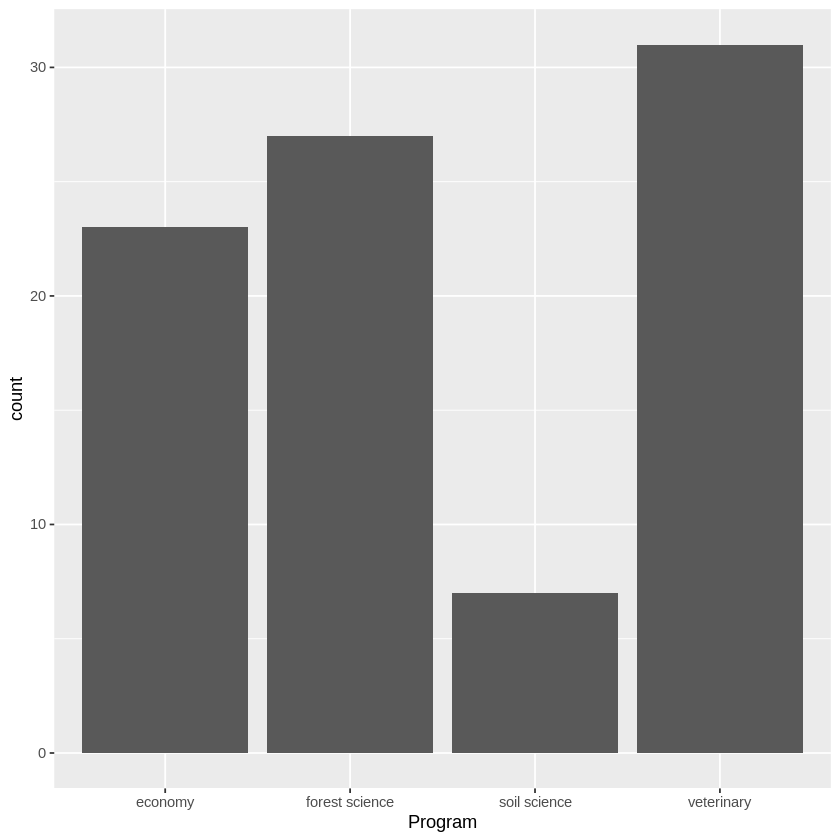

In [14]:
EatingHabits%>%ggplot(aes(Program))+geom_bar()

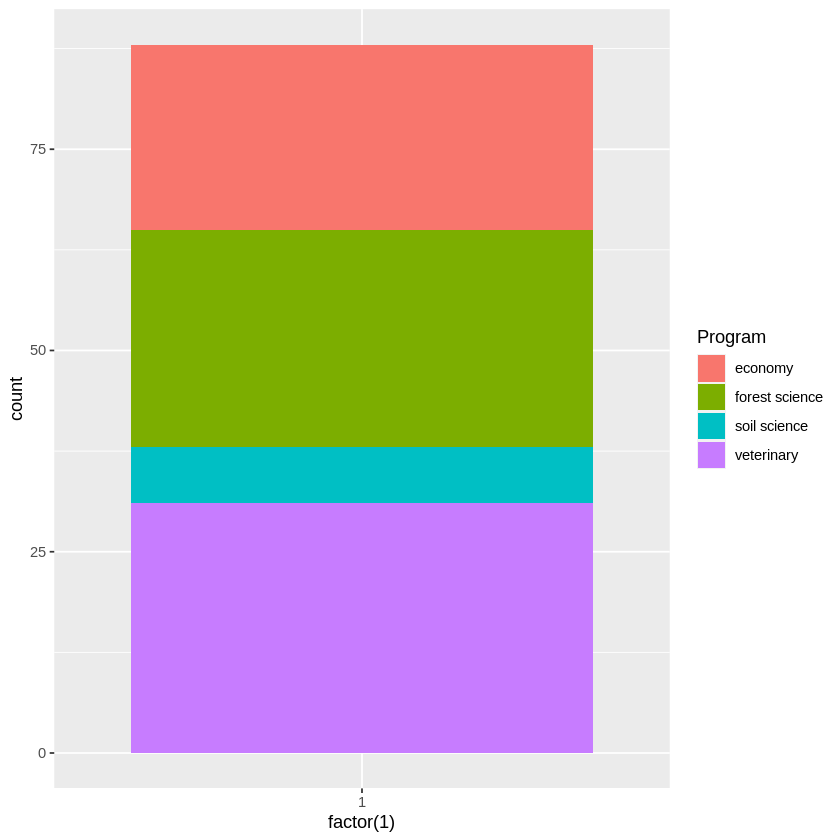

In [15]:
EatingHabits%>%ggplot(aes(x=factor(1), fill=Program))+geom_bar()

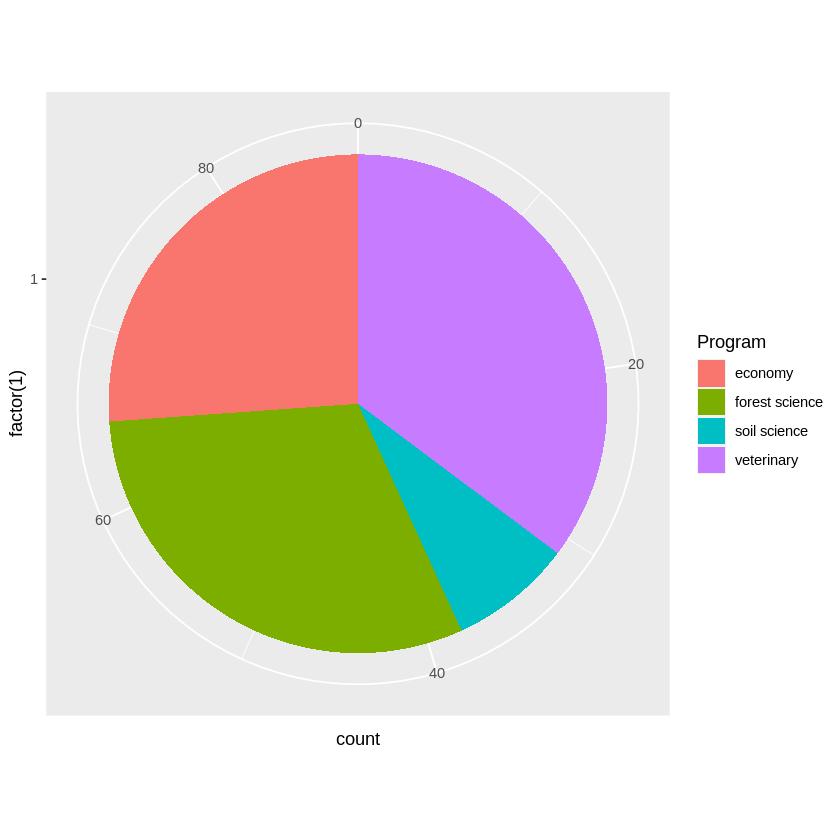

In [16]:
EatingHabits%>%ggplot(aes(x=factor(1), fill=Program))+geom_bar()+coord_polar("y", start=0)

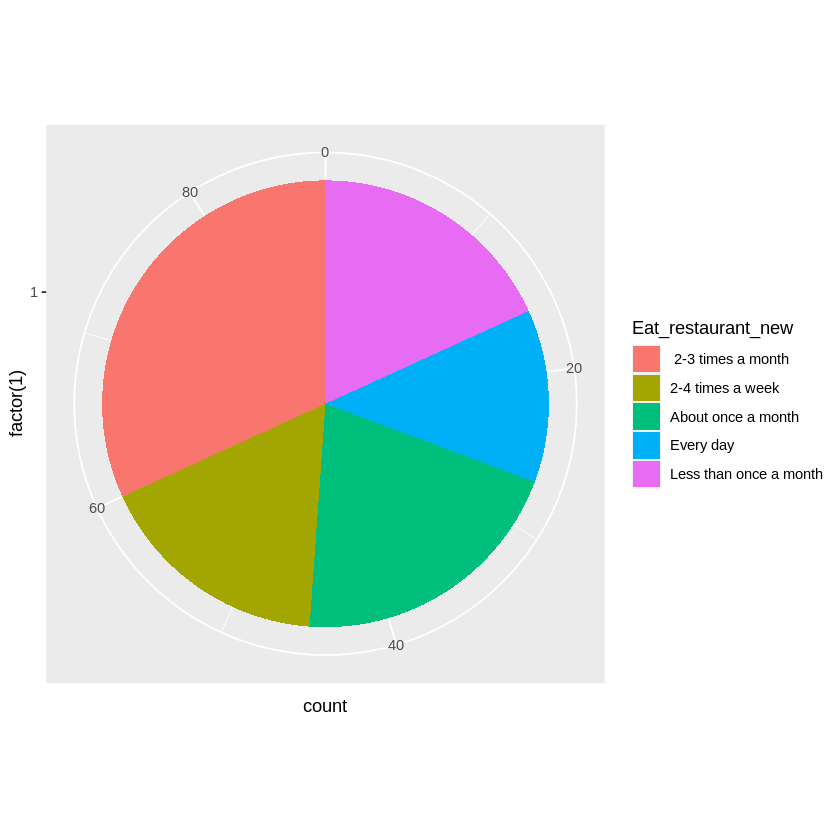

In [17]:
EatingHabits%>%mutate(Eat_restaurant_new=case_when(Eat_restaurant==1~"Less than once a month",Eat_restaurant==2~" 2-3 times a month",Eat_restaurant==3~"About once a month",Eat_restaurant==4~"2-4 times a week",Eat_restaurant==5~"Every day"))%>%ggplot(aes(x=factor(1), fill=Eat_restaurant_new))+geom_bar()+coord_polar("y", start=0)

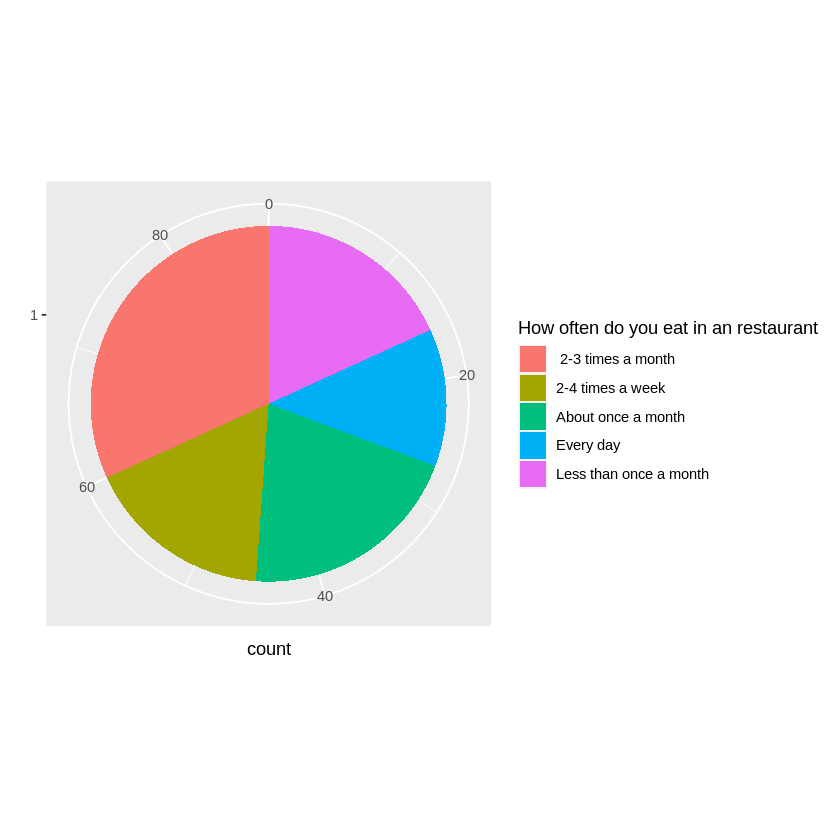

In [18]:
EatingHabits%>%mutate(Eat_restaurant_new=case_when(Eat_restaurant==1~"Less than once a month",Eat_restaurant==2~" 2-3 times a month",Eat_restaurant==3~"About once a month",Eat_restaurant==4~"2-4 times a week",Eat_restaurant==5~"Every day"))%>%ggplot(aes(x=factor(1), fill=Eat_restaurant_new))+geom_bar()+coord_polar("y", start=0)+labs(x="", fill="How often do you eat in an restaurant")

In [19]:
EatingHabits%>%group_by(Program)%>%summarise(n=n())%>%mutate(relfreq=n/sum(n))

`summarise()` ungrouping output (override with `.groups` argument)



Program,n,relfreq
<chr>,<int>,<dbl>
economy,23,0.26136364
forest science,27,0.30681818
soil science,7,0.07954545
veterinary,31,0.35227273


ScatterplotsA scatterplot (page 61, 503) can be used to illustrate the relationship between two continuousvariables. Here we use the variables Time and Stressed. As the second one is not actually a continuous variable the scatter plot is not optimal way of plotting it. We should see, however, that the level of stressdoes not have a clear effect on the time spend on eating lunch.

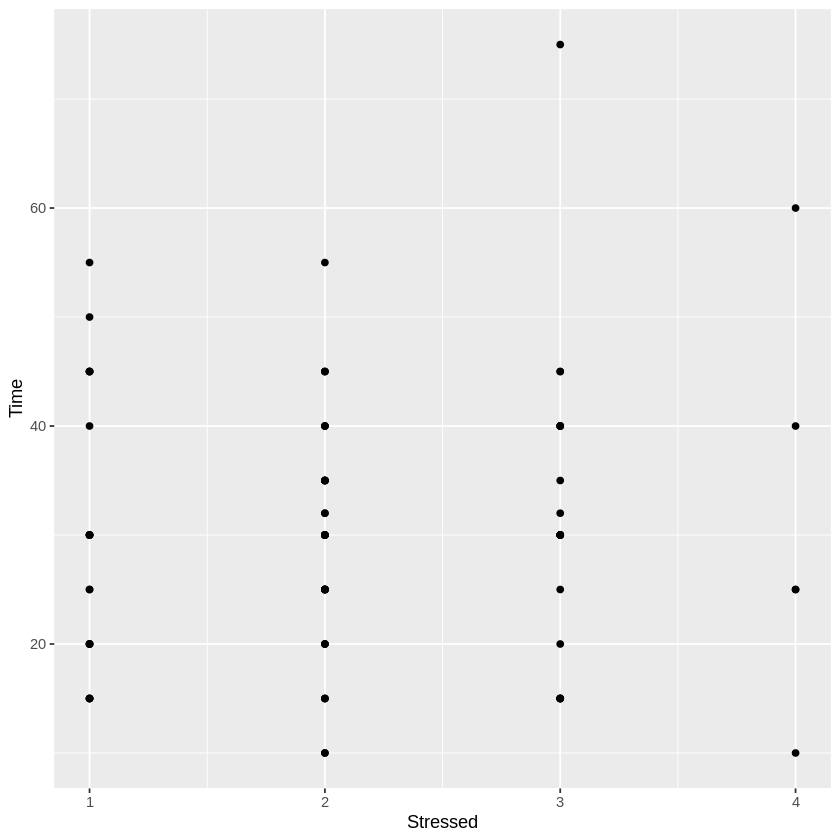

In [20]:
EatingHabits%>%ggplot(aes(x=Stressed, y=Time))+geom_point()

Correlation coefficients
To compute the Pearson correlation coefficient we need to first select the two continuous variables. Then the correlation coefficient is with the functioncor(). A high positive correlation coefficient (close to 1) indicates a positive relationship - if one variable increases also the other one increases.If the coefficient is negative a higher value of variable one would be associated with a lower value of variabletwo and vice versa. Here we have very little correlation between Time and Stressed. You will find the correlation coefficient to be close to 0.

In [22]:
EatingHabits%>%select(Time, Stressed)%>%cor()

,Time,Stressed
Time,1.00000000,0.04938351
Stressed,0.04938351,1.00000000


**Contingency table**

Categorical variables are often well described by contingency tables (page 381) are used. For example:

In [23]:
table(EatingHabits$Program, EatingHabits$Eat_restaurant)

                
                  1  2  3  4  5
  economy         4  9  8  2  0
  forest science  5 10  7  2  3
  soil science    2  2  2  1  0
  veterinary      5  7  1 10  8

Note: We need to use the$coding when using the functiontable(). Unlike other computations it is not easy to do with piping.

In [24]:
table1 <-table(EatingHabits$Program, EatingHabits$Eat_restaurant)

In [25]:
prop.table(table1)

                
                          1          2          3          4          5
  economy        0.04545455 0.10227273 0.09090909 0.02272727 0.00000000
  forest science 0.05681818 0.11363636 0.07954545 0.02272727 0.03409091
  soil science   0.02272727 0.02272727 0.02272727 0.01136364 0.00000000
  veterinary     0.05681818 0.07954545 0.01136364 0.11363636 0.09090909

In [26]:
prop.table(table1, 1) #or with proportions of e.g. row totals:

                
                          1          2          3          4          5
  economy        0.17391304 0.39130435 0.34782609 0.08695652 0.00000000
  forest science 0.18518519 0.37037037 0.25925926 0.07407407 0.11111111
  soil science   0.28571429 0.28571429 0.28571429 0.14285714 0.00000000
  veterinary     0.16129032 0.22580645 0.03225806 0.32258065 0.25806452

The last table gives you the proportion of answers in each of the five categories separately for each programthe respondent belongs to.

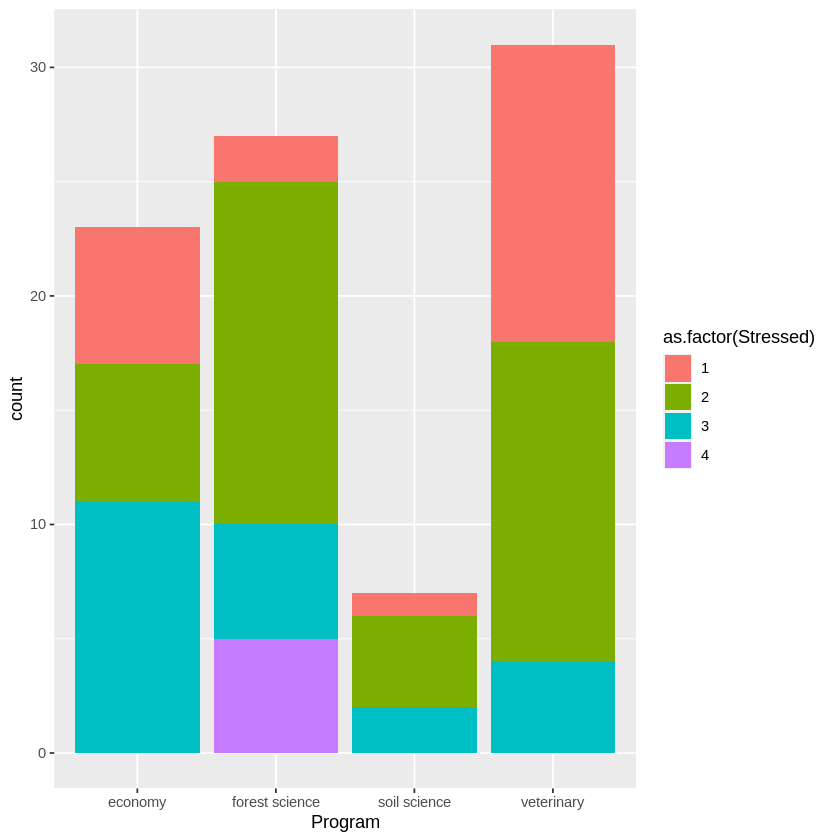

In [27]:
EatingHabits%>%ggplot(aes(Program, fill=as.factor(Stressed)))+geom_bar()

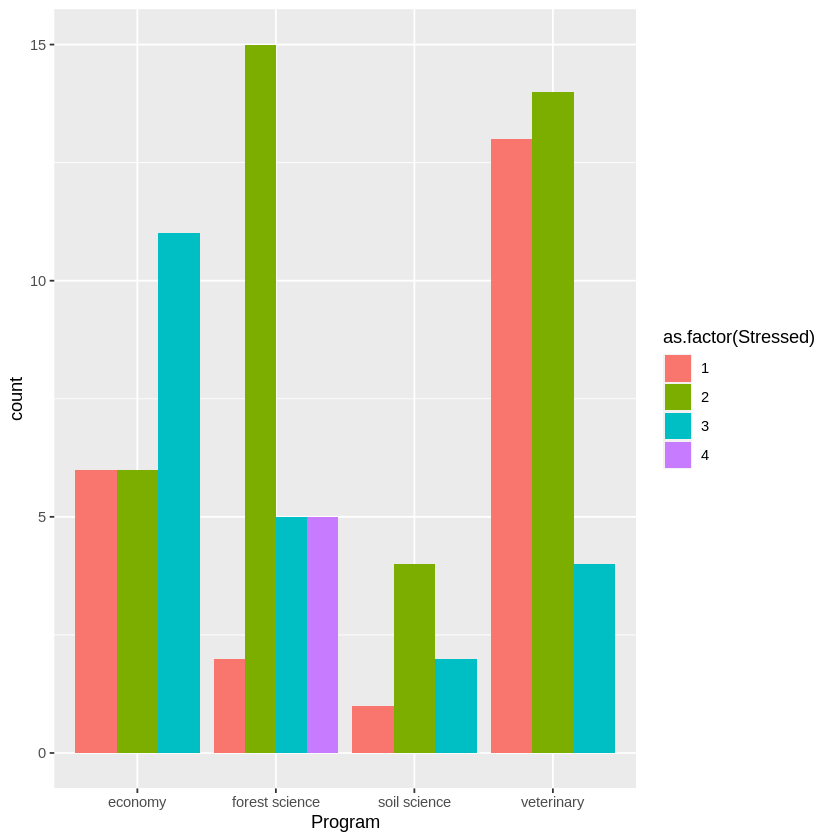

In [28]:
EatingHabits%>%ggplot(aes(Program, fill=as.factor(Stressed)))+geom_bar(position=position_dodge())

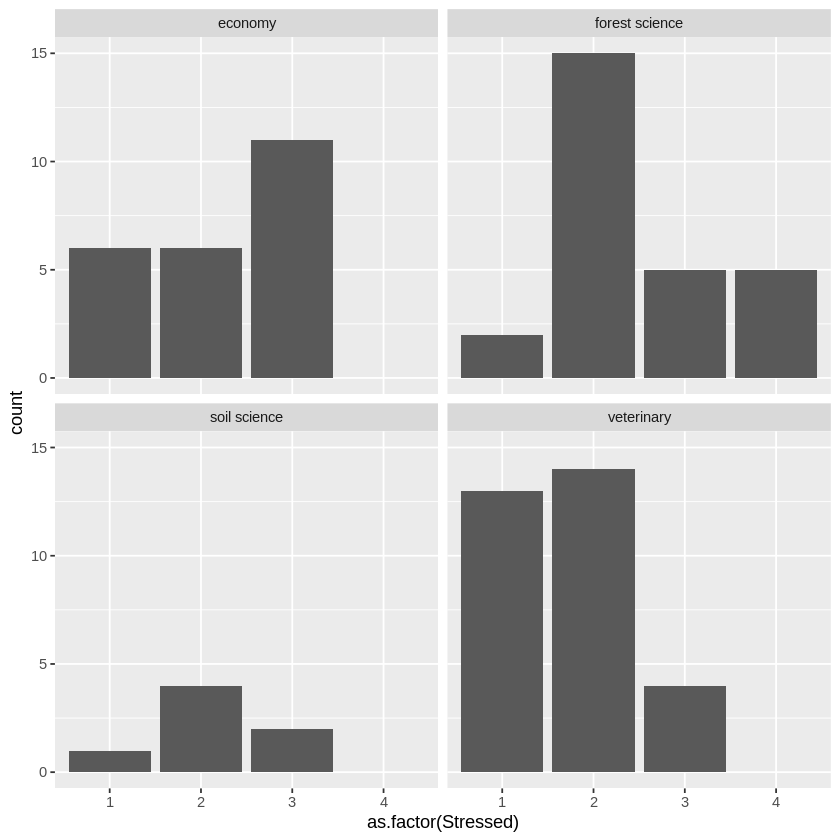

In [29]:
EatingHabits%>%ggplot(aes(as.factor(Stressed)))+geom_bar()+facet_wrap(~Program)

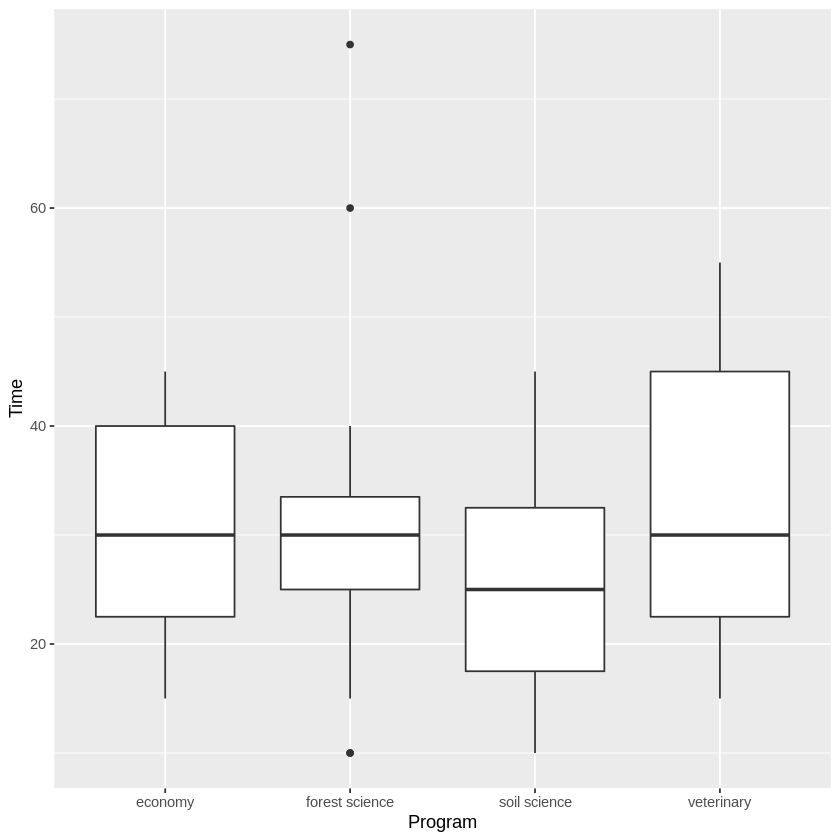

In [30]:
EatingHabits%>%ggplot(aes(y=Time, x=Program))+geom_boxplot()

In [32]:
EatingHabits%>%group_by(Program)%>%summarise(meanTime =mean(Time), medianTime =median(Time),varianceTime =var(Time), sdTime =sd(Time))

`summarise()` ungrouping output (override with `.groups` argument)



Program,meanTime,medianTime,varianceTime,sdTime
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
economy,29.78261,30,85.17787,9.229186
forest science,30.07407,30,178.99430,13.378875
soil science,25.71429,25,145.23810,12.051477
veterinary,31.90323,30,167.35699,12.936653


Boxplots and barcharts can be made with combinations of fill/xy and facet_wrap to visualise more than twovariables at the same time. Scatterplots can be combined withfacet_wrapto include categorical variables.